In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import os
from pyclustering.cluster.kmedoids import kmedoids
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
#import plotly.graph_objects as go
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [103]:
data=pd.read_csv('C:\\Users\\PC\\Downloads\\Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [104]:
data.drop(['CustomerID','Age'],axis='columns',inplace=True)

In [139]:
data['Spending Score (1-100)']=data['Spending Score (1-100)'].astype(float)
#data['Annual Income (k$)']=data['Annual Income (k$)'].astype(float)
data.dtypes

Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [118]:
#encoder = LabelEncoder()

#data["Gender"] = encoder.fit_transform(data["Gender"])

#gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}
#gender_mapping

In [120]:
#data.drop(['Gender'],axis='columns',inplace=True)

In [114]:
data

,Annual Income (k$),Spending Score (1-100)
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0
...,...,...
195,120.0,79.0
196,126.0,28.0
197,126.0,74.0
198,137.0,18.0


In [141]:
#cluster = AgglomerativeClustering(n_clusters=4).fit(data)
#linked=linkage(cluster,'single')
#cluster.fit_predict(data)
#print(cluster.labels_)

agglomerative_clustering = AgglomerativeClustering(n_clusters=5).fit(data)
agglomerative_clustering
linked = linkage(agglomerative_clustering.children_, 'single')


In [142]:
agglomerative_clustering.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

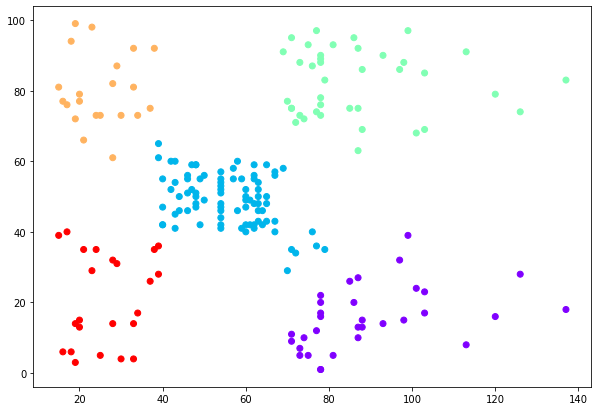

In [143]:
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=agglomerative_clustering.labels_, cmap='rainbow')

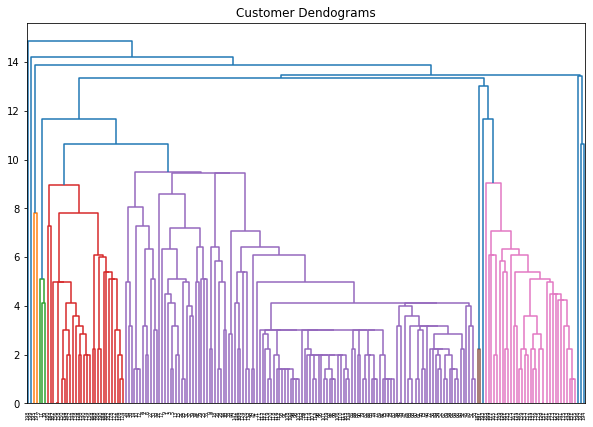

In [137]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='single'))